Best Parameters: OrderedDict([('model__ccp_alpha', 0.05), ('model__max_depth', 40), ('model__min_samples_leaf', 4), ('model__min_samples_split', 50)])
Train R^2: 0.542537300524052
Test R^2: 0.5375273763246143
Test MSE: 147.5398925617451


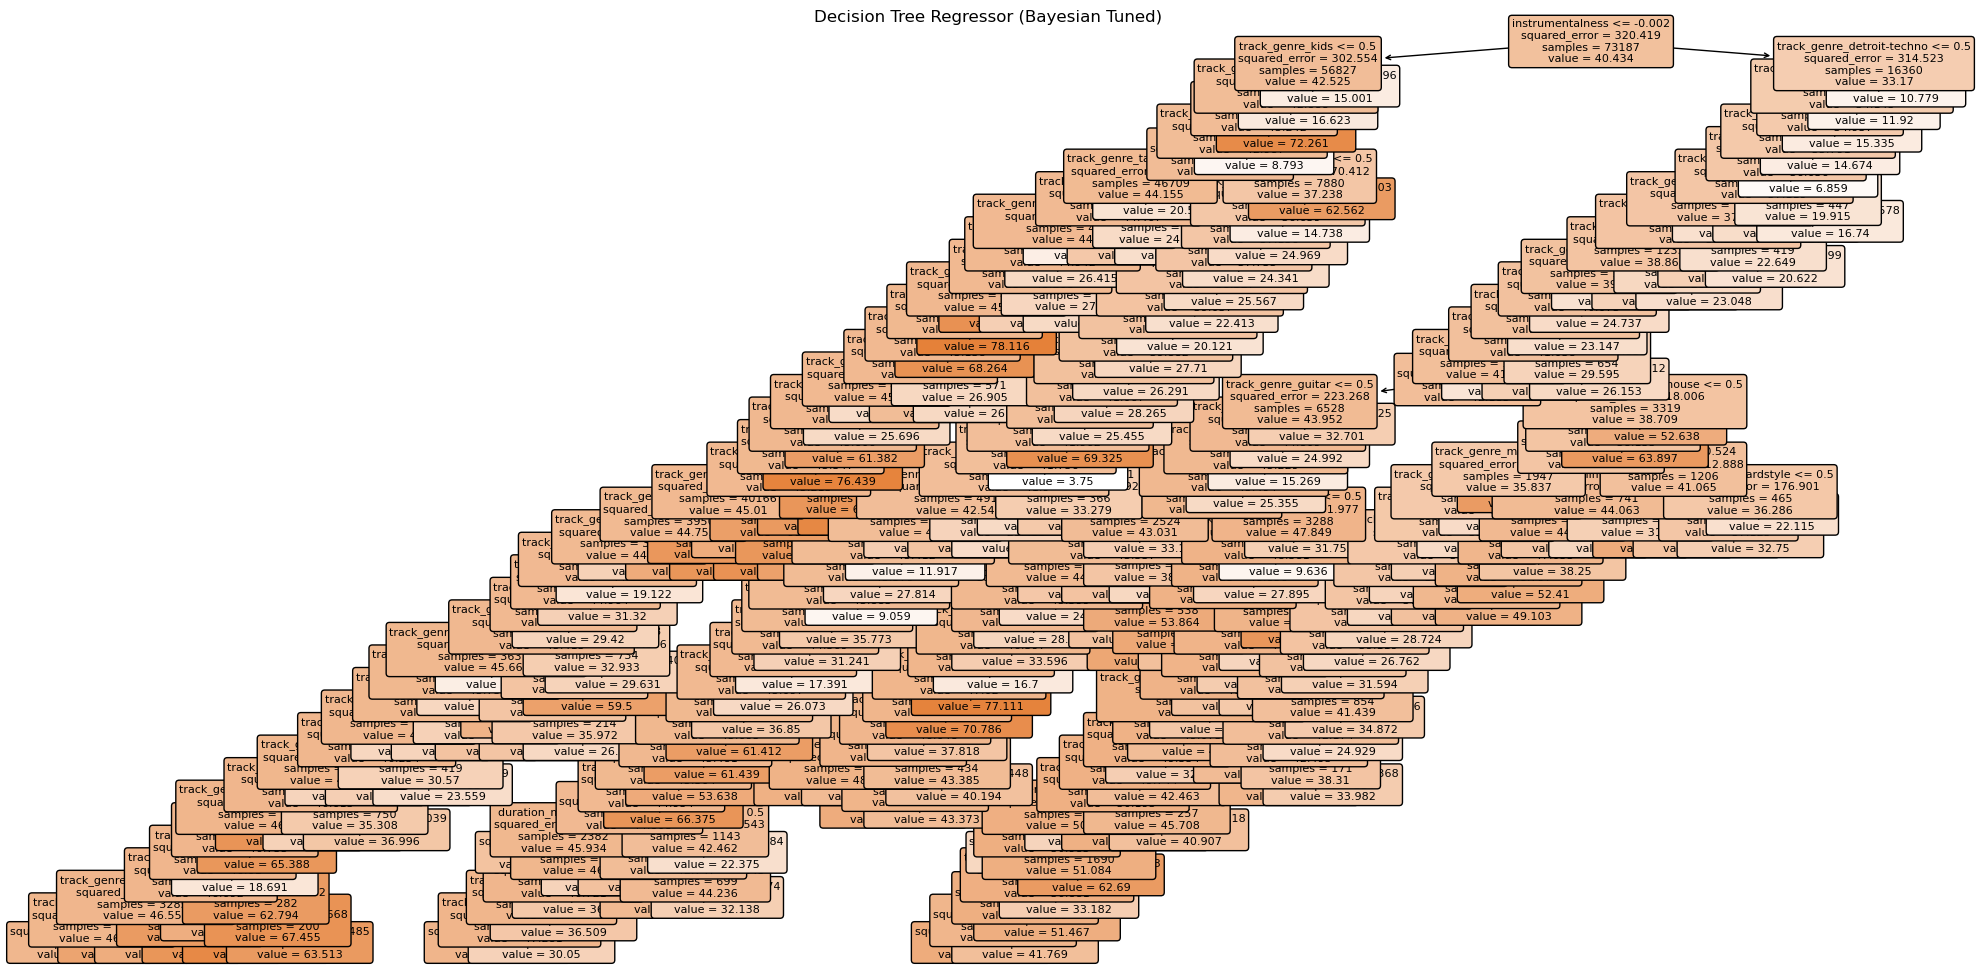

In [ ]:
# Regular Decision Tree using Bayesian Optimization to Find All Of The Best Parameters

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from skopt import BayesSearchCV
from skopt.space import Integer, Real

df = pd.read_csv("Cleaned_Dataset.csv")
df['explicit'] = df['explicit'].astype(int)

numerical_features = [
    'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
    'mode', 'speechiness', 'acousticness', 'instrumentalness',
    'liveness', 'valence', 'tempo', 'time_signature'
]
categorical_features = ['track_genre']
all_features = numerical_features + categorical_features

X = df[all_features]
y = df['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Pipeline
pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', DecisionTreeRegressor(random_state=42))
])

search_spaces = {
    'model__max_depth': Integer(5, 40),
    'model__min_samples_split': Integer(2, 50),
    'model__min_samples_leaf': Integer(1, 50),
    'model__ccp_alpha': Real(0.0, 0.05)
}

# Bayesian Optimization
opt = BayesSearchCV(
    estimator=pipeline,
    search_spaces=search_spaces,
    n_iter=30,
    scoring='r2',
    cv=3,
    n_jobs=-1,
    random_state=42
)

opt.fit(X_train, y_train)
best_pipeline = opt.best_estimator_
y_train_pred = best_pipeline.predict(X_train)
y_test_pred = best_pipeline.predict(X_test)

print("Best Parameters:", opt.best_params_)
print("Train R^2:", r2_score(y_train, y_train_pred))
print("Test R^2:", r2_score(y_test, y_test_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))

best_tree = best_pipeline.named_steps['model']
X_encoded = preprocessor.fit_transform(X_train)

ohe = preprocessor.named_transformers_['cat']
encoded_cat_names = ohe.get_feature_names_out(categorical_features)
feature_names = numerical_features + list(encoded_cat_names)

plt.figure(figsize=(24, 12))
plot_tree(best_tree, feature_names=feature_names, filled=True, rounded=True, fontsize=8)
plt.title(f"Decision Tree Regressor (Bayesian Tuned)")
plt.show()

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

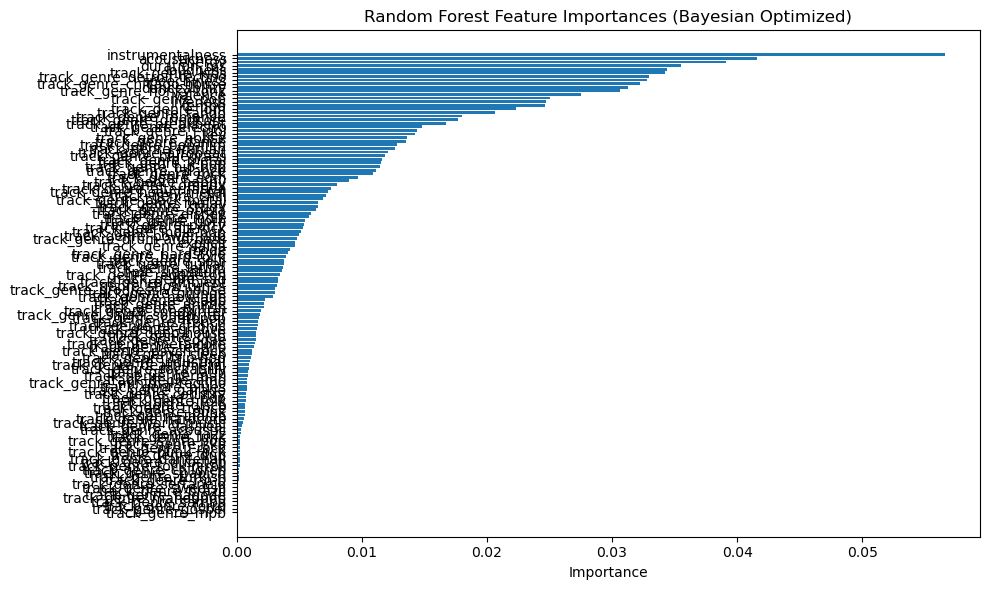

In [3]:
# Random Forest using Bayesian Optimization to Find All Of The Best Parameters

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
from skopt import BayesSearchCV
from skopt.space import Integer, Categorical

df = pd.read_csv("Cleaned_Dataset.csv")
df['explicit'] = df['explicit'].astype(int)

numerical_features = [
    'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
    'mode', 'speechiness', 'acousticness', 'instrumentalness',
    'liveness', 'valence', 'tempo', 'time_signature'
]
categorical_features = ['track_genre']
all_features = numerical_features + categorical_features

X = df[all_features]
y = df['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', RandomForestRegressor(random_state=42, n_jobs=-1))
])

search_space = {
    'model__n_estimators': Integer(100, 300),
    'model__max_depth': Integer(10, 40),
    'model__min_samples_leaf': Integer(1, 10),
    'model__min_samples_split': Integer(2, 10),
    'model__max_features': Categorical(['sqrt', 'log2'])
}

# Bayesian Optimization
opt = BayesSearchCV(
    estimator=pipeline,
    search_spaces=search_space,
    n_iter=30,
    scoring='r2',
    cv=3,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

opt.fit(X_train, y_train)

best_pipeline = opt.best_estimator_
y_train_pred = best_pipeline.predict(X_train)
y_test_pred = best_pipeline.predict(X_test)

print("Best Parameters:", opt.best_params_)
print("Train R²:", r2_score(y_train, y_train_pred))
print("Test R²:", r2_score(y_test, y_test_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))

rf_model = best_pipeline.named_steps['model']
ohe = best_pipeline.named_steps['preprocess'].named_transformers_['cat']
encoded_cat_names = ohe.get_feature_names_out(categorical_features)
feature_names = numerical_features + list(encoded_cat_names)

importances = rf_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title("Random Forest Feature Importances (Bayesian Optimized)")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

XGBoost Results:
Best Parameters: OrderedDict([('model__learning_rate', 0.11565675421213895), ('model__max_depth', 15), ('model__min_child_weight', 10), ('model__n_estimators', 300)])
Train R²: 0.9402018309281603
Test R²: 0.6679805579069201
Test MSE: 105.92218935148779


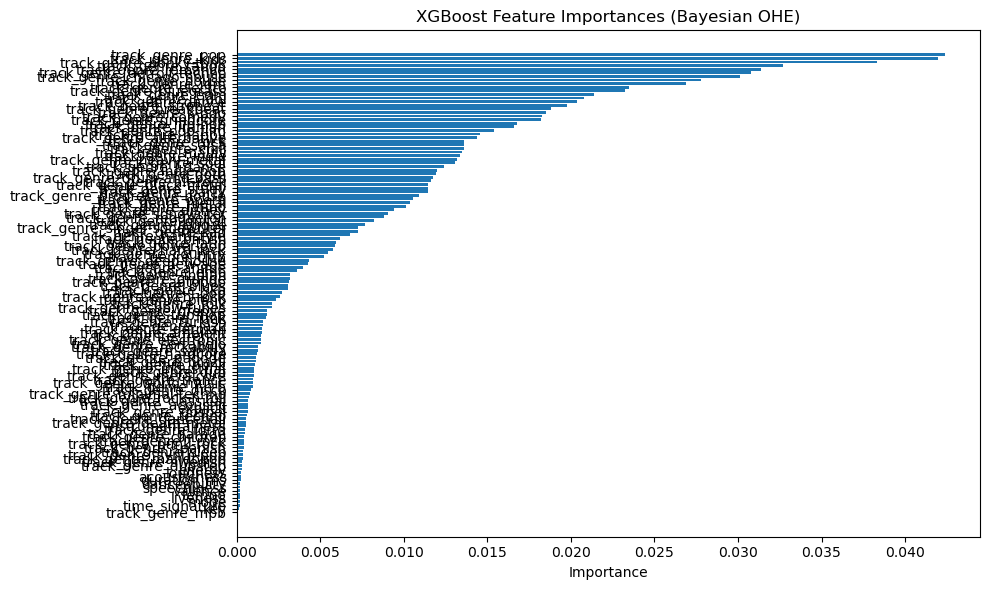

In [7]:
# XGBoost using Bayesian Optimization to Find All Of The Best Parameters

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
from skopt import BayesSearchCV
from skopt.space import Real, Integer

df = pd.read_csv("Cleaned_Dataset.csv")

df['explicit'] = df['explicit'].astype(int)

numerical_features = [
    'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
    'mode', 'speechiness', 'acousticness', 'instrumentalness',
    'liveness', 'valence', 'tempo', 'time_signature'
]
categorical_features = ['track_genre']
all_features = numerical_features + categorical_features

X = df[all_features]
y = df['popularity']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

preprocessor = ColumnTransformer([
    ('num', 'passthrough', numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', XGBRegressor(objective='reg:squarederror', n_jobs=-1, random_state=42))
])

search_spaces = {
    'model__n_estimators': Integer(100, 300),
    'model__max_depth': Integer(3, 15),
    'model__learning_rate': Real(0.01, 0.2, prior='log-uniform'),
    'model__min_child_weight': Integer(1, 10)
}

# Bayesian optimization
opt = BayesSearchCV(
    estimator=pipeline,
    search_spaces=search_spaces,
    n_iter=30,
    scoring='r2',
    cv=3,
    n_jobs=-1,
    random_state=42,
    verbose=0
)

opt.fit(X_train, y_train)

best_pipeline = opt.best_estimator_
y_train_pred = best_pipeline.predict(X_train)
y_test_pred = best_pipeline.predict(X_test)

results = {
    "Best Parameters": opt.best_params_,
    "Train R²": r2_score(y_train, y_train_pred),
    "Test R²": r2_score(y_test, y_test_pred),
    "Test MSE": mean_squared_error(y_test, y_test_pred)
}

xgb_model = best_pipeline.named_steps['model']
ohe = best_pipeline.named_steps['preprocess'].named_transformers_['cat']
encoded_cat_names = ohe.get_feature_names_out(categorical_features)
feature_names = numerical_features + list(encoded_cat_names)
importances = xgb_model.feature_importances_
indices = np.argsort(importances)

print("XGBoost Results:")
for key, value in results.items():
    print(f"{key}: {value}")

plt.figure(figsize=(10, 6))
plt.title("XGBoost Feature Importances (Bayesian OHE)")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

C:\Users\xayas\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagged Forest Results:
Best Parameters: OrderedDict([('model__base_estimator__max_depth', 30), ('model__base_estimator__min_samples_leaf', 4), ('model__n_estimators', 76)])
Train R²: 0.5827983107198438
Test R²: 0.5208868856796988
Test MSE: 152.84860939435237


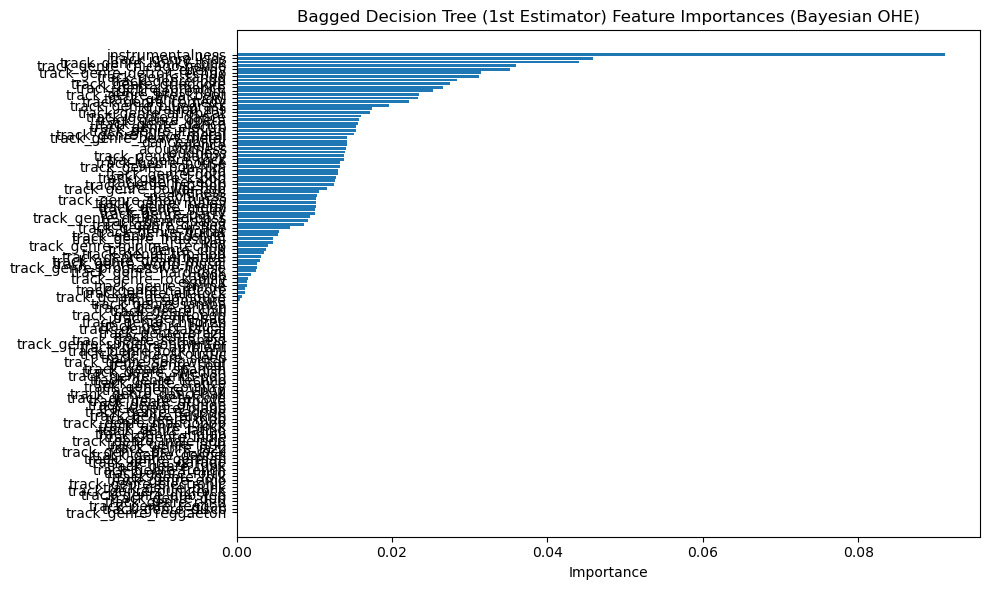

In [9]:
# Bagged Forest using Bayesian Optimization to Find All Of The Best Parameters

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_squared_error
from skopt import BayesSearchCV
from skopt.space import Integer

df = pd.read_csv("Cleaned_Dataset.csv")
df['explicit'] = df['explicit'].astype(int)

numerical_features = [
    'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
    'mode', 'speechiness', 'acousticness', 'instrumentalness',
    'liveness', 'valence', 'tempo', 'time_signature'
]
categorical_features = ['track_genre']
all_features = numerical_features + categorical_features

X = df[all_features]
y = df['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer([
    ('num', 'passthrough', numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', BaggingRegressor(
        base_estimator=DecisionTreeRegressor(random_state=42),
        random_state=42,
        n_jobs=-1
    ))
])

search_spaces = {
    'model__n_estimators': Integer(10, 100),
    'model__base_estimator__max_depth': Integer(5, 30),
    'model__base_estimator__min_samples_leaf': Integer(1, 10)
}

# Bayesian Optimization
opt = BayesSearchCV(
    estimator=pipeline,
    search_spaces=search_spaces,
    n_iter=30,
    scoring='r2',
    cv=3,
    n_jobs=-1,
    random_state=42,
    verbose=0
)

opt.fit(X_train, y_train)
best_pipeline = opt.best_estimator_
y_train_pred = best_pipeline.predict(X_train)
y_test_pred = best_pipeline.predict(X_test)

results = {
    "Best Parameters": opt.best_params_,
    "Train R²": r2_score(y_train, y_train_pred),
    "Test R²": r2_score(y_test, y_test_pred),
    "Test MSE": mean_squared_error(y_test, y_test_pred)
}

first_tree = best_pipeline.named_steps['model'].estimators_[0]
ohe = best_pipeline.named_steps['preprocess'].named_transformers_['cat']
encoded_cat_names = ohe.get_feature_names_out(categorical_features)
feature_names = numerical_features + list(encoded_cat_names)

importances = first_tree.feature_importances_
indices = np.argsort(importances)

print("Bagged Forest Results:")
for key, value in results.items():
    print(f"{key}: {value}")

plt.figure(figsize=(10, 6))
plt.title("Bagged Decision Tree (1st Estimator) Feature Importances (Bayesian OHE)")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002330 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2798
[LightGBM] [Info] Number of data points in the train set: 73187, number of used features: 128
[LightGBM] [Info] Start training from score 40.433615
Best Parameters: OrderedDict([('model__learning_rate', 0.2), ('model__max_depth', 10), ('model__min_child_samples', 30), ('model__n_estimators', 300)])
Train R^2: 0.7381652280869053
Test R^2: 0.6537208360064557
Test MSE: 110.47138368094849


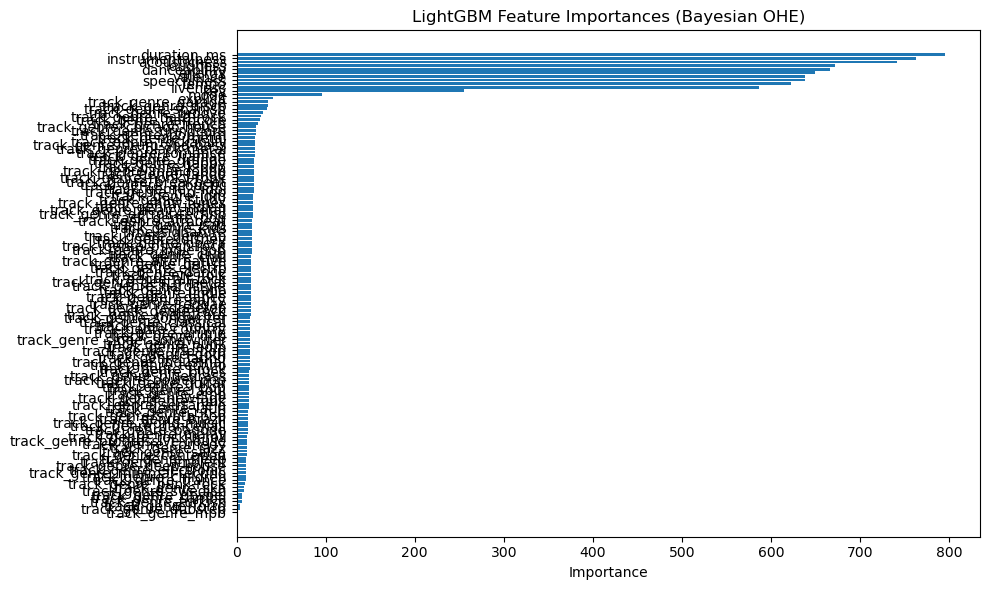

In [12]:
# LightGBM with Bayesian Optimization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
from skopt import BayesSearchCV
from skopt.space import Real, Integer

df = pd.read_csv("Cleaned_Dataset.csv")
df['explicit'] = df['explicit'].astype(int)

numerical_features = [
    'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
    'mode', 'speechiness', 'acousticness', 'instrumentalness',
    'liveness', 'valence', 'tempo', 'time_signature'
]
categorical_features = ['track_genre']
all_features = numerical_features + categorical_features

X = df[all_features]
y = df['popularity']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

preprocessor = ColumnTransformer([
    ('num', 'passthrough', numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', LGBMRegressor(objective='regression', random_state=42, n_jobs=-1))
])

search_spaces = {
    'model__n_estimators': Integer(100, 300),
    'model__max_depth': Integer(3, 15),
    'model__learning_rate': Real(0.01, 0.2, prior='log-uniform'),
    'model__min_child_samples': Integer(5, 30)
}

# Bayes Search
opt = BayesSearchCV(
    estimator=pipeline,
    search_spaces=search_spaces,
    n_iter=30,
    scoring='r2',
    cv=3,
    n_jobs=-1,
    random_state=42,
    verbose=0
)

opt.fit(X_train, y_train)
best_pipeline = opt.best_estimator_

y_train_pred = best_pipeline.predict(X_train)
y_test_pred = best_pipeline.predict(X_test)

print("Best Parameters:", opt.best_params_)
print("Train R^2:", r2_score(y_train, y_train_pred))
print("Test R^2:", r2_score(y_test, y_test_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))

lgbm_model = best_pipeline.named_steps['model']
ohe = best_pipeline.named_steps['preprocess'].named_transformers_['cat']
encoded_cat_names = ohe.get_feature_names_out(categorical_features)
feature_names = numerical_features + list(encoded_cat_names)
importances = lgbm_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title("LightGBM Feature Importances (Bayesian OHE)")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

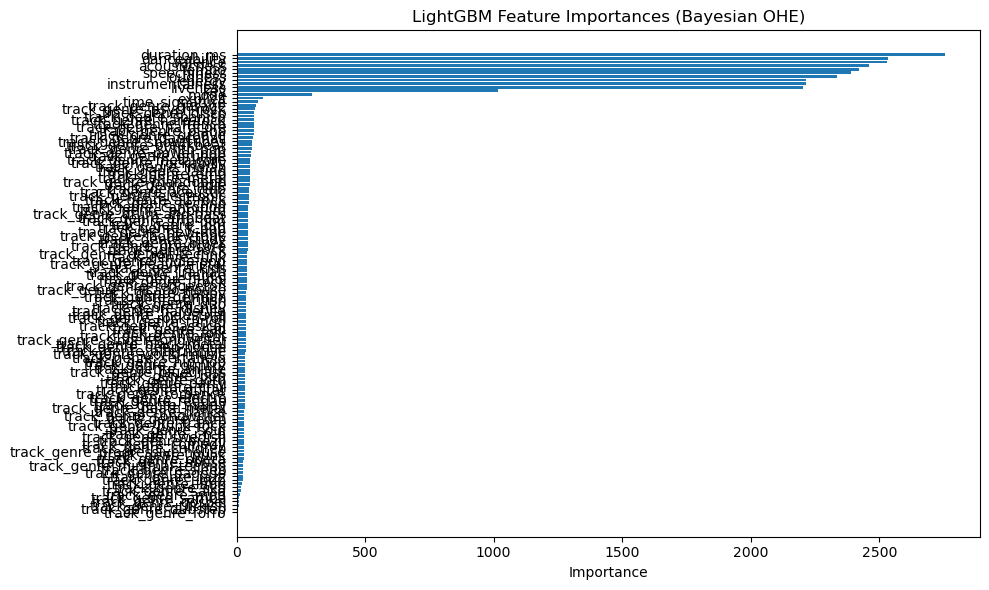

In [ ]:
# LightGBM with Bayesian Optimization using more parameters

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
from skopt import BayesSearchCV
from skopt.space import Real, Integer

df = pd.read_csv("Cleaned_Dataset.csv")
df['explicit'] = df['explicit'].astype(int)

numerical_features = [
    'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
    'mode', 'speechiness', 'acousticness', 'instrumentalness',
    'liveness', 'valence', 'tempo', 'time_signature'
]
categorical_features = ['track_genre']
all_features = numerical_features + categorical_features

X = df[all_features]
y = df['popularity']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

preprocessor = ColumnTransformer([
    ('num', 'passthrough', numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', LGBMRegressor(objective='regression', random_state=42, n_jobs=-1))
])

search_spaces = {
    'model__n_estimators': Integer(100, 1000),
    'model__max_depth': Integer(3, 30),
    'model__learning_rate': Real(0.005, 0.2, prior='log-uniform'),
    'model__min_child_samples': Integer(1, 50),
    'model__subsample': Real(0.6, 1.0),
    'model__colsample_bytree': Real(0.6, 1.0),
    'model__reg_alpha': Real(0.0, 1.0),
    'model__reg_lambda': Real(0.0, 1.0)
}

opt = BayesSearchCV(
    estimator=pipeline,
    search_spaces=search_spaces,
    n_iter=80,  # Try more iterations
    scoring='r2',
    cv=5,       # Higher CV folds = more stable
    n_jobs=-1,
    random_state=42,
    verbose=1
)

opt.fit(X_train, y_train)
best_pipeline = opt.best_estimator_

y_train_pred = best_pipeline.predict(X_train)
y_test_pred = best_pipeline.predict(X_test)

print("Best Parameters:", opt.best_params_)
print("Train R^2:", r2_score(y_train, y_train_pred))
print("Test R^2:", r2_score(y_test, y_test_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))

lgbm_model = best_pipeline.named_steps['model']
ohe = best_pipeline.named_steps['preprocess'].named_transformers_['cat']
encoded_cat_names = ohe.get_feature_names_out(categorical_features)
feature_names = numerical_features + list(encoded_cat_names)
importances = lgbm_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title("LightGBM Feature Importances (Bayesian OHE)")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Importance")
plt.tight_layout()
plt.show()